In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

racing = pd.read_csv("Data/CleanedDataRacing.csv")
racing.head()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Average,2600,3DS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X,X360,XOne
0,2008,6,15.68,12.80,3.79,3.29,35.57,14.226,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2005,6,9.71,7.48,4.13,1.90,23.22,9.288,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,6,6.85,5.09,1.87,1.16,14.98,5.990,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,6,5.20,4.19,2.70,0.94,13.04,5.214,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2004,6,3.01,0.01,1.10,7.53,11.66,4.662,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#calculate average sales for action genre from 1997 to 2011
data = {'Year': [],
        'Average Sales': []}
sales = pd.DataFrame(data)
year = 1997
for i in range(15):
    x = racing[racing['Year_of_Release'] == year]
    avg = x['Average'].mean()
    globalsales = x['Global_Sales'].mean()
    
    data = {'Year': year,
            'Average Sales': avg,
            'Global Sales': globalsales}
    sales = sales.append(data, ignore_index=True)
    year += 1

sales['Year'] = sales['Year'].astype(int) 
sales

,Year,Average Sales,Global Sales
0,1997,3.167000,7.915000
1,1998,1.198000,2.995000
2,1999,2.319333,5.800000
3,2000,1.052000,2.630000
4,2001,2.658500,6.645000
5,2002,NaN,NaN
6,2003,2.514000,6.283333
7,2004,2.831333,7.080000
8,2005,4.165333,10.413333
9,2006,1.546000,3.870000


In [18]:
#replace NaN values with average
gblAvg = sales['Global Sales'].mean()
Avg = sales['Average Sales'].mean()
sales['Global Sales'] = sales['Global Sales'].replace(np.nan, gblAvg)
sales['Average Sales'] = sales['Average Sales'].replace(np.nan, Avg)
sales.head()

,Year,Average Sales,Global Sales
0,1997,3.167000,7.915
1,1998,1.198000,2.995
2,1999,2.319333,5.800
3,2000,1.052000,2.630
4,2001,2.658500,6.645


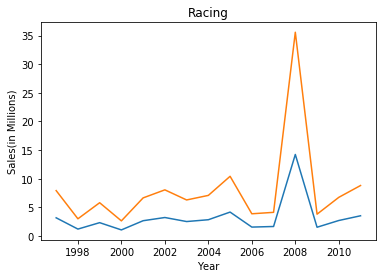

In [19]:
#sales plot
plt.plot(sales['Year'], sales['Average Sales'], sales['Year'], sales['Global Sales'])
plt.title('Racing')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()

In [2]:
#for SVR algorithm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

y = racing['Average'] #output
ygl = racing['Global_Sales']
X = np.array(racing['Year_of_Release']).reshape(-1,1) #input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
Xgl_train, Xgl_test, ygl_train, ygl_test = train_test_split(X, y, test_size=0.2)

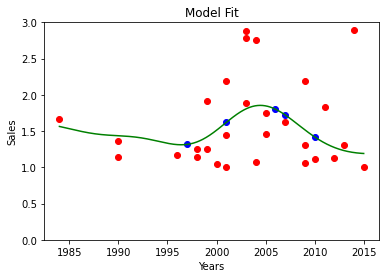

In [3]:
model = SVR(kernel='rbf')
modelgl = SVR(kernel='rbf')

model.fit(X_train, y_train)
modelgl.fit(Xgl_train, ygl_train)
prediction = model.predict(X_test)
predictiongl = modelgl.predict(Xgl_test)
# model.score(X_test, y_test)

# prediction

X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# plt.scatter(X_test, prediction)
plt.ylim(top=3)
plt.title('Model Fit')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, model.predict(X_grid), color='green')
plt.scatter(X_test, prediction, color='blue')
plt.show()  #why you do dis???

In [22]:
#mean squared error (manual)
tot = 0
for x in range(5):
    y = (np.array(y_test)[x]-prediction[x])**2
    tot = tot + y
print(tot/26)

0.3385856662033937


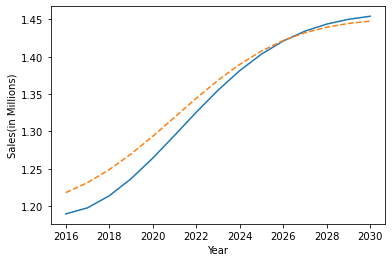

In [6]:
#make predictions
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global': []}
future_sales = pd.DataFrame(data)
future_sales['Prediction_Year'] = future_sales['Prediction_Year'].astype(int)

for i in range(15):
    x = model.predict([[year[i]]])
    xgl = modelgl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': x,
            'Global': xgl}
    future_sales = future_sales.append(data, ignore_index=True)

plt.plot(future_sales['Prediction_Year'], future_sales['Predicted_Sales'])
plt.plot(future_sales['Prediction_Year'], future_sales['Global'], ls = '--')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()


In [5]:
import joblib

filename = 'savedModels/racing.joblib'
joblib.dump(model, filename)

['savedModels/racing.joblib']

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

print(mean_squared_error(y_test, prediction))
test_rmse = sqrt(mean_squared_error(y_test, prediction))
print(test_rmse/statistics.mean(y_test))

1.7606454642576472
0.5912017297885239


In [25]:
print(test_rmse)

1.326893162337363


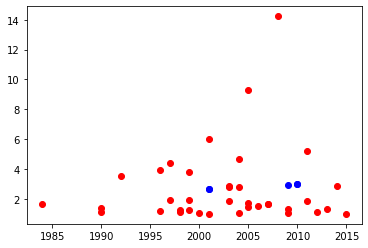

array([2.79208192])

In [26]:
#for XGBoost algorithm
# from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, y_train)
# prediction_xgb = xgb_classifier.predict(X_test)

line = LinearRegression()
linegbl = LinearRegression()
line.fit(X_train, y_train)
linegbl.fit(Xgl_train, ygl_train)
prediction_lin = line.predict(X_test)


plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, prediction_lin, color='blue')
plt.show()
line.predict([[2005]])

In [27]:
rmse_lin = mean_squared_error(y_test, prediction_lin)
print(rmse_lin)

1.4748736768336848


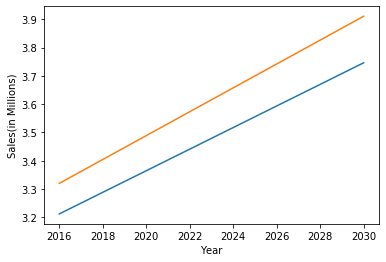

,Prediction_Year,Predicted_Sales,Global Sales
0,2016,[3.211919055799072],[3.319903070490355]
1,2017,[3.2500860680014227],[3.362110233560003]
2,2018,[3.2882530802037735],[3.4043173966296507]
3,2019,[3.32642009240611],[3.4465245596992986]
4,2020,[3.3645871046084608],[3.4887317227689323]
5,2021,[3.4027541168108115],[3.53093888583858]
6,2022,[3.440921129013148],[3.573146048908228]
7,2023,[3.479088141215499],[3.615353211977876]
8,2024,[3.5172551534178496],[3.657560375047524]
9,2025,[3.555422165620186],[3.6997675381171717]


In [28]:
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global Sales': []}
future_sales_lin = pd.DataFrame(data)
future_sales_lin['Prediction_Year'] = future_sales_lin['Prediction_Year'].astype(int)

for i in range(15):
    lin = line.predict([[year[i]]])
    lingbl = linegbl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': lin,
            'Global Sales': lingbl}
    future_sales_lin = future_sales_lin.append(data, ignore_index=True)

plt.plot(future_sales_lin['Prediction_Year'], future_sales_lin['Predicted_Sales'], future_sales_lin['Prediction_Year'], future_sales_lin['Global Sales'])
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()
future_sales_lin

In [29]:
print(modelgl.predict([[2031]]))
print(linegbl.predict([[2056]]))

[1.56369344]
[5.00818959]


In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37, 1) (5, 1) (37,) (5,)


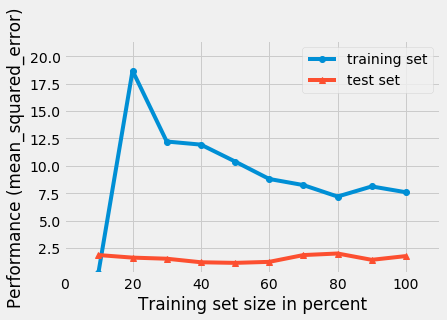

In [31]:
from mlxtend.plotting import plot_learning_curves

#change C and epsilon values
#over, under and best fit

clf = SVR(kernel='rbf')
# clf2 = LinearRegression()

plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='mean_squared_error', print_model=False)
plt.show()